<div>
<a href="https://github.com/groupmm/edu_novfct"><img src="data/Edu_NovFct_Teaser.png" width=100% style="float: right;" alt="PCP Teaser"></a>
</div>

# Figure 1

Idealized novelty functions for various MIR tasks.

### Figure 1a

Musical score of the beginning of the second piano etude from Op. 100 by Burgmüller.

<img src="./data/example_Burgmueller_score.png" width="700px" align="left" alt="example_Burgmueller_score.png">

### Figure 1b

Audio recording of the corresponding excerpt.

<audio src="./data/example_Burgmueller_audio.mp3" type="audio/mpeg" controls="controls"></audio>

In the following code cell, we do the following:
* Import all necessary libraries and functions used in the notebook.
* Set the configurations for the figures.
* Plot the waveform of the audio excerpt (Figure 1b).

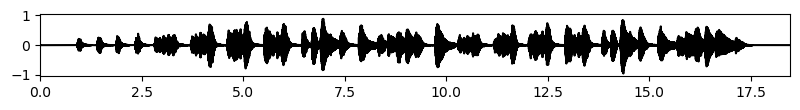

In [1]:
import os, sys
import numpy as np
# from numba import jit
import librosa
from scipy import signal
from matplotlib import pyplot as plt
import IPython.display as ipd
from scipy.ndimage import gaussian_filter1d
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
import libfmp.b
import libfmp.c2
import libfmp.c6

%matplotlib inline

### load audio wav and adjust amplitude
fn_wav = os.path.join('./data/example_Burgmueller_audio.wav')
Fs = 22050
x, Fs = librosa.load(fn_wav)
x_duration = len(x)/Fs
x = x*1.5 

### Settings for figures
export = False
figsize=(8.0,1.2)
figsize_wav=(8.1,1.2)
dpi = 100
plot_xlim = [0, x_duration]
plot_ylim_wav = [-1.05, 1.05]
plot_ylim = [0, 1.1]

### Figure01b
libfmp.b.plot_signal(x, Fs, color='k', dpi=dpi, figsize=figsize_wav, xlabel='')
plt.xlim(plot_xlim)
plt.ylim(plot_ylim_wav)
plt.tight_layout()

output_path = os.path.join('./export/Figure01b.png')
if export==True:
    plt.savefig(output_path)

### Figure 1c 

Onset detection.

In the following code cell, we define functions for reading annotations (e.g., time positions of onsets), converting the annotations into ideal binary novelty functions, apply a Gaussian smoothing kernel, and plot the resulting novelty function (Figure 1c). 

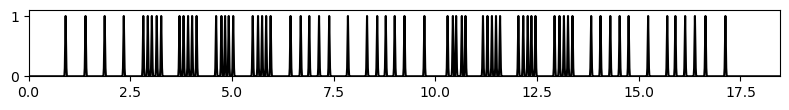

In [2]:
### Figure01c
def csv2dict(csvpath ):
    ### Read the provided .csv and organize the four types of annotations
    ann_info = np.array(pd.read_csv(csvpath, header = None))
    ann_dict = {'onset':[], 'beat':[], 'downbeat':[], 'structure':[]}
    for ann_str in ann_info[1:]:
        time, ann_type = ann_str[0].split(';')
        ann_dict[ann_type.strip('"')].append(float(time))
    return ann_dict

def insertZeros(events, end_sec = None, FPS =100):
    ### convert the events into a frame-based binary representation with assigned frame rate
    if end_sec:
        end_frame = math.ceil(end_sec*FPS)+1
    else:
        end_frame = math.ceil(events[-1]*FPS)+1 ##index of the final frame
    ISz_array = np.zeros((end_frame, ))
    for ind, event in enumerate(list(events)):
        ISz_array[round(event*FPS)] = 1
    return ISz_array

Fs_nov = 100 ## frame-rate of the ideal novelty function
csvpath = './data/example_Burgmueller_ann.csv'
ann_dict = csv2dict(csvpath )
### Frame-based binary representation for onsets
ideal_onset = insertZeros(ann_dict['onset'], end_sec = x_duration, FPS = Fs_nov)

### Gaussian filter
sigma = 1
ideal_onset = gaussian_filter1d(ideal_onset, sigma = sigma, mode = 'constant')
### Min-max normalization
ideal_onset = MinMaxScaler().fit_transform(X=ideal_onset[:, np.newaxis])[:, 0]

libfmp.b.plot_signal(ideal_onset, Fs_nov, color='k', dpi=dpi, figsize=figsize, xlabel='')
plt.xlim(plot_xlim)
plt.ylim(plot_ylim)
plt.tight_layout()
output_path = os.path.join('./export/Figure01c.png')
if export == True:
    plt.savefig(output_path)

### Figure 1d

Beat tracking.

In the following code cell, we generate and plot an idealized novelty function for beat tracking (Figure 1d).

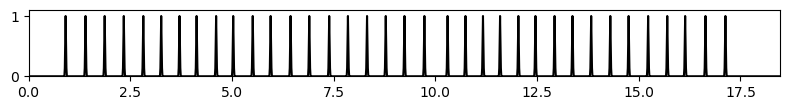

In [3]:
### Figure01d
#### Frame-based binary representation for beats
ideal_beat = insertZeros(ann_dict['beat'], end_sec = x_duration, FPS = Fs_nov)

### Gaussian filter
sigma = 1
ideal_beat = gaussian_filter1d(ideal_beat, sigma = sigma, mode = 'constant')
### Min-max normalization
ideal_beat = MinMaxScaler().fit_transform(X=ideal_beat[:, np.newaxis])[:, 0]

libfmp.b.plot_signal(ideal_beat, Fs_nov, color='k', dpi=dpi, figsize=figsize, xlabel='')
plt.xlim(plot_xlim)
plt.ylim(plot_ylim)
plt.tight_layout()
output_path = os.path.join('./export/Figure01d.png')
if export == True:
    plt.savefig(output_path)

### Figure 1e

Downbeat (measure) tracking.

In the following code cell, we generate and plot an idealized novelty function for downbeat tracking (Figure 1e).

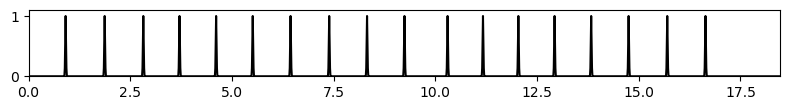

In [4]:
### Figure01e
#### Frame-based binary representation for downbeats
ideal_dbeat = insertZeros(ann_dict['downbeat'], end_sec = x_duration, FPS = Fs_nov)

### Gaussian fileter
sigma = 1
ideal_dbeat = gaussian_filter1d(ideal_dbeat  , sigma = sigma, mode = 'constant')
### Min-max normalization
ideal_dbeat = MinMaxScaler().fit_transform(X=ideal_dbeat[:, np.newaxis])[:, 0]


libfmp.b.plot_signal(ideal_dbeat, Fs_nov, color='k', dpi=dpi, figsize=figsize, xlabel='')
plt.xlim(plot_xlim)
plt.ylim(plot_ylim)
plt.tight_layout()
output_path = os.path.join('./export/Figure01e.png')
if export == True:
    plt.savefig(output_path)

### Figure 1f

Boundary estimation for music structure analysis.

In the following code cell, we generate and plot an idealized novelty function for boundary estimation (Figure 1f).

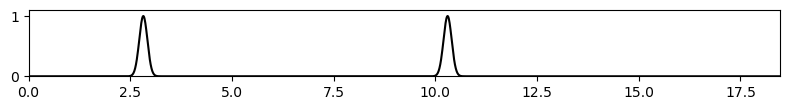

In [5]:
### Figure01f
#### Frame-based binary representation for structure
ideal_struct = insertZeros(ann_dict['structure'], end_sec = x_duration, FPS = Fs_nov)

### Gaussian filter
sigma = 10
ideal_struct = gaussian_filter1d(ideal_struct, sigma = sigma, mode = 'constant')
### Min-max normalization
ideal_struct = MinMaxScaler().fit_transform(X=ideal_struct[:, np.newaxis])[:, 0]

libfmp.b.plot_signal(ideal_struct, Fs_nov, color='k', dpi=dpi, figsize=figsize, xlabel='')
plt.xlim(plot_xlim)
plt.ylim(plot_ylim)
plt.tight_layout()
output_path = os.path.join('./export/Figure01f.png')
if export == True:
    plt.savefig(output_path)

### Further Notes and Links


<ul>
<li><span style="color:black">
Meinard MüllerChing-Yu Chiu: <a href="https://ieeexplore.ieee.org/document/6353546"><strong>A Basic Tutorial on Novelty and Activation Functions for Music Signal Processing.</strong></a> Transaction of the International Society for Music Information Retrieval (TISMIR), ??: ??–??, 2024. 
<br>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="../data/bibtex_MuellerC24_EduNovFct_TISMIR.txt"> Bibtex </a>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="https://github.com/groupmm/edu_novfct">GitHub</a></span></li>
</ul> 

<div>
<a href="https://opensource.org/licenses/MIT"><img src="data/Edu_NovFct_License.png" width=100% style="float: right;" alt="PCP License"></a>
</div>